<center><h2>K-omo solucionar Bogotá</h2></center>
<center><h2>Un acercamiento aplicado a K-Means y Clusters en Machine Learning</h2></center>
<center><h3>Juan David Dueñas Garavito</h3></center>


<h3>Ruta de trabajo</h3>
<p>La idea principal de este Notebook es generar toda la información necesaria para el IEEE UN Workshop a realizarse el 8 de mayo, por lo cual vamos a enumerar diferentes tareas a realizar las cuales iran aumentando a medida que el proyecto se desarrolle </p>

     - Empezamos detallando que es el algoritmo de k-means
     - Hablamos de las aplicaciones a urbanismo y datos espaciales
     - Introducimos el problema Urbanistico de Bogotá
     - Hacemos Data-Cleaning
     - Corremos K-means para cluserizar estaciones de TM
     - Concluimos

<h2>¿Que es k-means y k-nearest neigthbor?</h2>  

<h3>K-means</h3>

Podemos decir que K-means es un metodo de clustering no supervisado en donde buscamos identificar y agrupar datos según k similitudes, el algoritmo que veremos más adelante busca asignar cada dato a alguno de los k grupos minimizando la varianza dentro de los grupos y maximizando la varianza entre los grupos. es decir, el objeto del algoritmo es formar conjuntos cuyos integrantes sean muy parecidos y que los conjuntos entre si sean muy diferentes.

Este algoritmo funciona de la siguente manera: sus inputs son unos datos y un número K, primero se generan k centroides y se le da a cada uno una posición geografica aleatoria, posterior empezamos la iteración de los siguientes dos pasos:

     - Asignamos cada dato a su centroide más cercano en función de la distancia cuadrada euclidiana, 
       matematicamente se puede ver de la siguiente manera:
       
<center> 
    $\underset{c_i}{\text{min}}\, dist(c_{i}, x)^2$
</center>

    - actualizamos la posición de los centroides, la nueva posición del centroide j será determinada a partir de la media de
      todos los puntos del grupo j, matematicamente se puede ver de la siguiente manera:
    
<center>
    $c_j = \frac{1}{|S_j|}\sum_{x_i \in S_j} x_i$
</center>

Esta iteración va a terminar convergiendo a un punto en el cual la posición de los centroides despues de cada iteración no va a cambiar significativamente.


<h3>Ejemplo</h3>

Inciamos importando las librerias para llevar a cabo este algoritmo, a su vez que creamos un dataframe de ejemplo 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

mall_customers = load_iris(as_frame=True)
X = mall_customers.data.values

Visualizamos el Dataframe

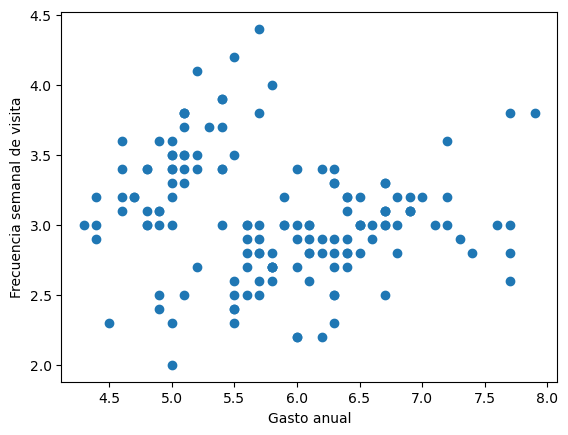

In [2]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Gasto anual')
plt.ylabel('Frecuencia semanal de visita')
plt.show()

Estandarizamos (media = 0 y varianza unitaria) los datos para posteriormente aplicar el kmeans con k=2 es decir dos conjuntos de datos, lo visualizamos con Matplotlib y le pedimos que nos permita ver la posición de los 2 centroides generados

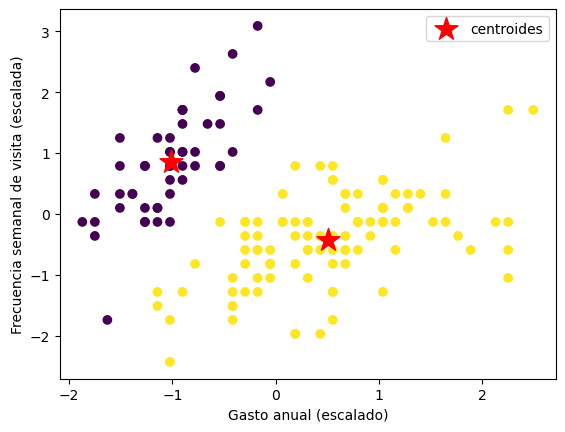

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            color='r', label='centroides')
plt.legend()
plt.xlabel('Gasto anual (escalado)')
plt.ylabel('Frecuencia semanal de visita (escalada)')
plt.show()

<h2>El problema de Bogotá </h2>

Trancones, trancones y más trancones queremos sacar el comportamiento de Transmilenio durante un dia promedio... (completar)

In [50]:
import requests
import numpy as np
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shapely.geometry import Point
import contextily as ctx
import plotly.express as px
import imageio
import kaleido
from io import BytesIO
from PIL import Image
pd.options.mode.chained_assignment = None
import plotly.io as pio
import scipy.stats as stats
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from shapely.ops import nearest_points


Descargamos un dataset desde los datos abiertos de transmilenio, especificamente las validaciones del componente troncal

In [5]:
os.chdir("C:/Users/PC/Documents/Repos/K-omo_solucionar_Bog")

In [6]:
if not os.path.isfile("../datos/tm/validacionTroncal20230213.csv"):
    url = 'https://storage.googleapis.com/validaciones_tmsa/ValidacionTroncal/validacionTroncal20230213.csv'
    response = requests.get(url)

    with open('../datos/tm/validacionTroncal20230213.csv', 'wb') as file:
        file.write(response.content)
else:
    print("ARCHIVO YA EXISTE")

ARCHIVO YA EXISTE


Abrimos el Dataset en Pyton para hacer un adecuado proceso de EDA, identificamos variables, fomatos, posibles datos nulos y seleccionamos las variables que son de nuestro interes (Estacion_Parada y Fecha_transacción en este caso).

In [7]:
data = pd.read_csv("../datos/tm/validacionTroncal20230213.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933333 entries, 0 to 1933332
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Acceso_Estacion             object 
 1   Day_Group_Type              object 
 2   Dispositivo                 int64  
 3   Emisor                      object 
 4   Estacion_Parada             object 
 5   Fase                        object 
 6   Fecha_Clearing              object 
 7   Fecha_Transaccion           object 
 8   Hora_Pico_SN                object 
 9   ID_Vehiculo                 float64
 10  Linea                       object 
 11  Nombre_Perfil               object 
 12  Numero_Tarjeta              object 
 13  Operador                    object 
 14  Ruta                        float64
 15  Saldo_Despues_Transaccion   float64
 16  Saldo_Previo_a_Transaccion  float64
 17  Sistema                     object 
 18  Tipo_Tarifa                 int64  
 19  Tipo_Tarjeta         

In [8]:
data.isnull().sum()

Acceso_Estacion                     0
Day_Group_Type                      0
Dispositivo                         0
Emisor                              0
Estacion_Parada                     0
Fase                                0
Fecha_Clearing                      0
Fecha_Transaccion                   0
Hora_Pico_SN                        0
ID_Vehiculo                   1933333
Linea                               0
Nombre_Perfil                       0
Numero_Tarjeta                      0
Operador                            0
Ruta                          1933333
Saldo_Despues_Transaccion           0
Saldo_Previo_a_Transaccion          0
Sistema                             0
Tipo_Tarifa                         0
Tipo_Tarjeta                        0
Tipo_Vehiculo                 1933333
Valor                               0
dtype: int64

In [9]:
data.head()

,Acceso_Estacion,Day_Group_Type,Dispositivo,Emisor,Estacion_Parada,Fase,Fecha_Clearing,Fecha_Transaccion,Hora_Pico_SN,ID_Vehiculo,...,Numero_Tarjeta,Operador,Ruta,Saldo_Despues_Transaccion,Saldo_Previo_a_Transaccion,Sistema,Tipo_Tarifa,Tipo_Tarjeta,Tipo_Vehiculo,Valor
0,(01) Acceso Peatonal Oriental,Dia 1,650000187,(3101000) Bogota Card(Citizen),(06101) El Tiempo,Fase 3,2023-02-13,2023-02-09 17:10:04,Peak Time,NaN,...,1418b2335cf1f3046a6f6cdc6753738e8cbfbbcb859c9e...,(201) Trunk agency,NaN,2700.0,5650.0,TRONCAL,1,tullave Básica,NaN,2950.0
1,(01) Acceso Peatonal Oriental,Dia 1,650000187,(3101000) Bogota Card(Citizen),(06101) El Tiempo,Fase 3,2023-02-13,2023-02-09 17:10:07,Peak Time,NaN,...,9bb6a348bb551dce8ed2722cba5952d2a3a4ad64fd6d53...,(201) Trunk agency,NaN,72200.0,75150.0,TRONCAL,1,tullave Básica,NaN,2950.0
2,(01) Acceso Peatonal Oriental,Dia 1,650000187,(3101000) Bogota Card(Citizen),(06101) El Tiempo,Fase 3,2023-02-13,2023-02-09 17:10:09,Peak Time,NaN,...,ae8bba7198445b384a9dc4d3e3070e6b1cac305175080c...,(201) Trunk agency,NaN,40500.0,43450.0,TRONCAL,1,tullave Plus,NaN,2950.0
3,(01) Acceso Peatonal Oriental,Dia 1,650000187,(3101000) Bogota Card(Citizen),(06101) El Tiempo,Fase 3,2023-02-13,2023-02-09 17:10:12,Peak Time,NaN,...,f60eb33d0d9a384baf461d904e9fdb4d06c1968c47a367...,(201) Trunk agency,NaN,8200.0,11150.0,TRONCAL,1,tullave Plus,NaN,2950.0
4,(01) Acceso Peatonal Oriental,Dia 1,650000187,(3101000) Bogota Card(Citizen),(06101) El Tiempo,Fase 3,2023-02-13,2023-02-09 17:10:15,Peak Time,NaN,...,91ed4f30f14a62df0b9c7e52b0b5d1f902d0e332c9da76...,(201) Trunk agency,NaN,24450.0,27400.0,TRONCAL,1,tullave Básica,NaN,2950.0


In [10]:
Estaciones = data[["Estacion_Parada","Fecha_Transaccion"]].copy()
Estaciones["nombre_est"] = Estaciones["Estacion_Parada"].str[8:]
Estaciones.head()

,Estacion_Parada,Fecha_Transaccion,nombre_est
0,(06101) El Tiempo,2023-02-09 17:10:04,El Tiempo
1,(06101) El Tiempo,2023-02-09 17:10:07,El Tiempo
2,(06101) El Tiempo,2023-02-09 17:10:09,El Tiempo
3,(06101) El Tiempo,2023-02-09 17:10:12,El Tiempo
4,(06101) El Tiempo,2023-02-09 17:10:15,El Tiempo


Dividimos la fecha entre fecha (dia, mes y año) y hora para luego volverlos un dato de tiempo, más facil de manejar

In [11]:
Estaciones["Fecha_Transaccion"] = pd.to_datetime(Estaciones["Fecha_Transaccion"])
#data["hora"] = pd.to_datetime(data["hora"], format="%m/%d/%Y, %H:%M:%S")

Ahora analizamos los datos de las fechas para entender la extensión de nuestro DataSet

In [12]:
Estaciones['Fecha_Transaccion'].dt.day.value_counts()

13    1933101
9         134
14         98
Name: Fecha_Transaccion, dtype: int64

Nos damos cuenta que el grueso de los datos se encuentra el 13 de febrero. Por ende, limitamos nuestra base de datos a las validaciones ocurridas durante esta fecha y graficamos la frecuencia por tiempo de las validaciones en el sistema troncal, ademas de eliminar datos atipicos generados en horas fuera del funcionamiento de Transmilenio

In [13]:
Estaciones13Feb = Estaciones.loc[Estaciones["Fecha_Transaccion"].dt.day == 13]
Estaciones13Feb = Estaciones13Feb.loc[Estaciones["Fecha_Transaccion"].dt.hour >= 5]
Estaciones13Feb = Estaciones13Feb.loc[Estaciones["Fecha_Transaccion"].dt.hour <= 22]

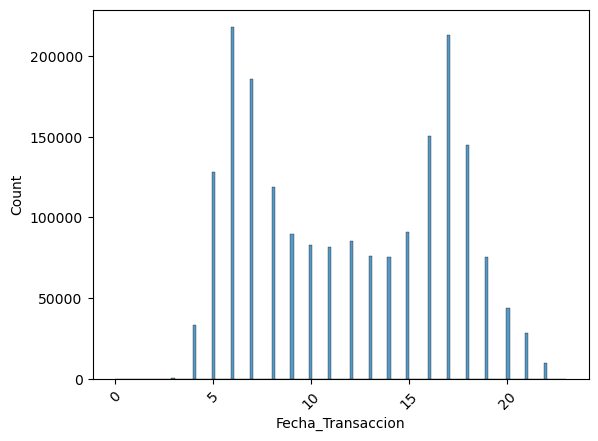

In [14]:
sns.histplot(data=Estaciones13Feb, x=Estaciones["Fecha_Transaccion"].dt.hour)
plt.xticks(rotation=45)
plt.show()

Cada una de las estaciones va a tener una distribución diferente de validaciones a lo largo del dia, la hipotesis radica en que las estaciones se dividen en 2 tipos, las estaciones residenciales y las estaciones laborales. En las primeras vamos a encontrar más validaciones en la hora pico de la mañana mientras que en las segundas vamos a encontrar más validaciones de lo normal en la hora pico de la tarde. Para esto vamos a graficar dos estaciones de ejemplo

Empezamos con lo que considerariamos una estación laboral, calle 100

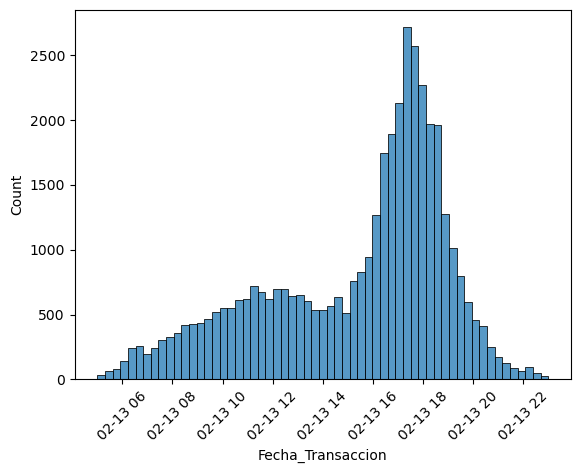

In [15]:
Estaciones13Feb.groupby(by='nombre_est') 
estacion_calle100 = Estaciones13Feb.groupby('nombre_est').get_group("Calle 100")

sns.histplot(data=estacion_calle100, x=estacion_calle100["Fecha_Transaccion"])
plt.xticks(rotation=45)
plt.show()

Como nos podemos dar cuenta la mayoria de validaciones de esta estación se encuentra en horas de la tarde, por otro lado una estación residencial como patio bonito tiene la siguiente distribución:

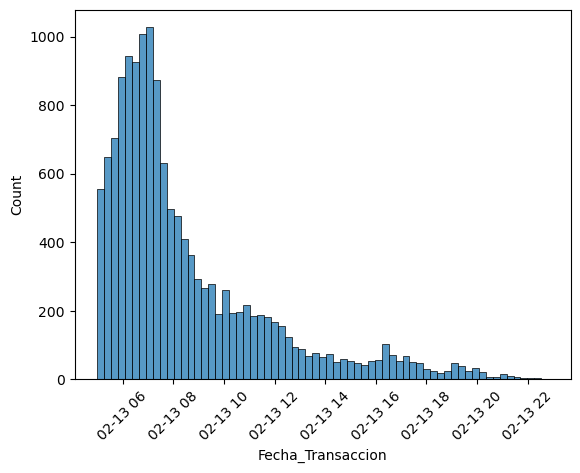

In [16]:
estacion_patio_bonito = Estaciones13Feb.groupby('nombre_est').get_group("Patio Bonito")

sns.histplot(data=estacion_patio_bonito, x=estacion_patio_bonito["Fecha_Transaccion"])
plt.xticks(rotation=45)
plt.show()

Agregando las 155 distribuciones (una por cada estación) nos encontramos con la siguiente grafica:

In [17]:
#sns.histplot(data=Estaciones13Feb, x="Fecha_Transaccion", hue='nombre_est', bins=48)
#plt.xticks(rotation=45)
#plt.show()

Es decir cada estación tiene su propia distribución durante el transcurso del día, para visualizar esto de mejor manera podemos ayudarnos de heatmaps que hagan cortes transversales a las distribuciones durante el dia.

Para esto empezamos a integrar los datos espaciales, importamos el Shapefile previamente descargado en nuestro local y visualizamos cada una de la ubicaciones espaciales de las estaciones de Trasmilenio sobre el mapa de Bogotá

In [18]:
troncales_shapefile = gpd.read_file("../datos/tm/Estaciones_Troncales_de_TRANSMILENIO.shp")
troncales_shapefile["longitud_y_latitud"] = troncales_shapefile["geometry"]
troncales_shapefile["longitud_y_latitud"] = troncales_shapefile["longitud_y_latitud"].astype(str)
troncales_shapefile["longitud_y_latitud"] = troncales_shapefile["longitud_y_latitud"].str[7:-1]


troncales_shapefile[['longitud', 'latitud']] = troncales_shapefile['longitud_y_latitud'].str.split(' ', 1, expand=True)
troncales_shapefile.head()

,objectid,numero_est,nombre_est,coordenada,coordena_1,ubicacion_,troncal_es,numero_vag,numero_acc,biciestaci,...,last_edite,last_edi_1,codigo_nod,componente,componen_1,log_replic,geometry,longitud_y_latitud,longitud,latitud
0,1,07103,AV. Chile,1.000327e+06,1.007756e+06,Kr 30 Cl 72,NQS,6,2,0,...,NaN,NaN,7103,NaN,NaN,NaN,POINT (-74.07456 4.66634),-74.0746 4.66634,-74.0746,4.66634
1,2,06103,CAN,9.976100e+05,1.005604e+06,Carrera 60,Calle 26,4,1,0,...,NaN,NaN,6103,NaN,NaN,NaN,POINT (-74.09905 4.64688),-74.099 4.64688,-74.099,4.64688
2,3,07106,Campín,9.998678e+05,1.005440e+06,Kr 30 Cl 53,NQS,2,2,0,...,NaN,NaN,7106,NaN,NaN,NaN,POINT (-74.07870 4.64540),-74.0787 4.6454,-74.0787,4.6454
3,4,10008,San Diego,1.000667e+06,1.001625e+06,Kra 10- Cl23,Cr 7-10,2,2,0,...,NaN,NaN,10008,NaN,NaN,NaN,POINT (-74.07150 4.61090),-74.0715 4.6109,-74.0715,4.6109
4,5,04100,Granja - Carrera 77,9.979466e+05,1.011384e+06,Carrera 77 Bis,Calle 80,3,2,0,...,NaN,NaN,4100,NaN,NaN,NaN,POINT (-74.09602 4.69915),-74.096 4.69915,-74.096,4.69915


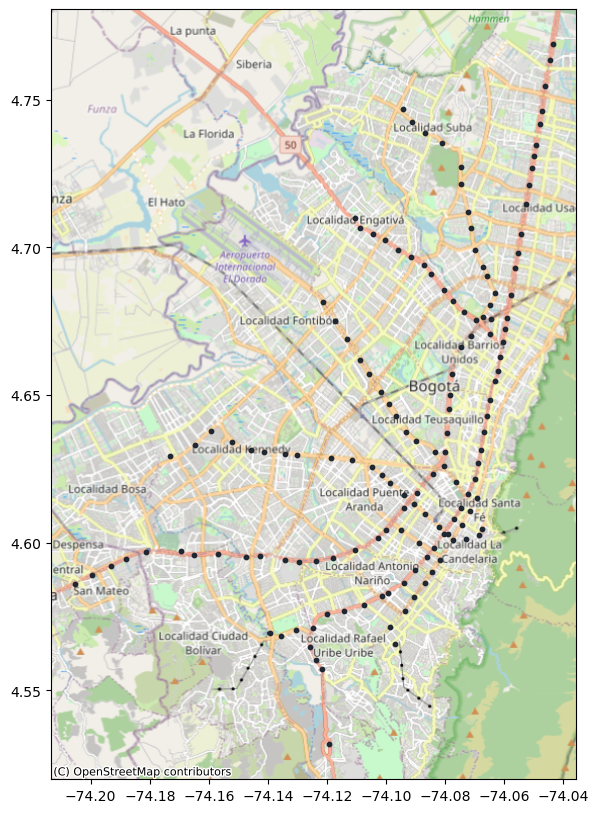

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
troncales_shapefile.plot(ax=ax, color="#1f2733", markersize=10, alpha=1)
ctx.add_basemap(ax, crs=troncales_shapefile.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [20]:
Estaciones13Feb.head()

,Estacion_Parada,Fecha_Transaccion,nombre_est
34194,(03000) Portal Suba,2023-02-13 05:00:00,Portal Suba
34195,(04000) Cabecera Calle 80,2023-02-13 05:00:00,Cabecera Calle 80
34196,(05000) Portal Américas,2023-02-13 05:00:00,Portal Américas
34197,(05000) Portal Américas,2023-02-13 05:00:00,Portal Américas
34198,(05000) Portal Américas,2023-02-13 05:00:00,Portal Américas


ahora vamos a hacer unas modificaciones a los Datasets con el fin de tener una columna igual en ambos datasets para posteriores merges

In [21]:
EstacionesHH = Estaciones13Feb.groupby(["Estacion_Parada" ,pd.Grouper(key='Fecha_Transaccion', freq='30min')]).count().reset_index()
EstacionesHH["numero_est"] = EstacionesHH["Estacion_Parada"].str[1:6]
EstacionesHH.head()

,Estacion_Parada,Fecha_Transaccion,nombre_est,numero_est
0,(02000) Cabecera Autopista Norte,2023-02-13 05:00:00,1896,02000
1,(02000) Cabecera Autopista Norte,2023-02-13 05:30:00,3285,02000
2,(02000) Cabecera Autopista Norte,2023-02-13 06:00:00,4646,02000
3,(02000) Cabecera Autopista Norte,2023-02-13 06:30:00,5195,02000
4,(02000) Cabecera Autopista Norte,2023-02-13 07:00:00,5677,02000


In [22]:
print(os.getcwd())
if not os.path.exists("../datos/tm/heatmap/"):
    os.mkdir("../datos/tm/heatmap")

if not os.path.isfile("../datos/tm/heatmap/heatmap0.png"):
    lista_cortes = []
    
    for i in range(5, 23):
        lista_cortes.append("2023-02-13"+" "+str(i)+":00:00")
        lista_cortes.append("2023-02-13"+" "+str(i)+":30:00")

    nombre_cortes = lista_cortes.copy()
    mapa_cortes = lista_cortes.copy()

    for i in range(len(nombre_cortes)):
        nombre_cortes[i] = "corte"+" "+str(nombre_cortes[i])

    for i in range(len(mapa_cortes)):
        mapa_cortes[i] = "mapa"+" "+str(mapa_cortes[i])

    for i in range(len(nombre_cortes)):
        nombre_cortes[i] = EstacionesHH["Fecha_Transaccion"] == lista_cortes[i]
        nombre_cortes[i] = EstacionesHH[nombre_cortes[i]]
        nombre_cortes[i].rename(columns={"nombre_est": "Validaciones"}, inplace=True)
        nombre_cortes[i] = pd.merge(troncales_shapefile, nombre_cortes[i], on="numero_est")
        mapa_cortes[i] = px.density_mapbox(nombre_cortes[i], 
                            lat='latitud', 
                            lon='longitud', 
                            z='Validaciones', 
                            radius=20, 
                            center=dict(lat=4.64688, lon=-74.099), 
                            zoom=10,
                            title = lista_cortes[i],
                            mapbox_style='open-street-map')
        ruta_archivo = "../datos/tm/heatmap/heatmap"+str(i)+".png"
        pio.write_image(mapa_cortes[i], ruta_archivo, format='png', width=800, height=600)
else:
    print("archivo ya existe")

C:\Users\PC\Documents\Repos\K-omo_solucionar_Bog
archivo ya existe


In [23]:
print(os.getcwd())
if not os.path.isfile("../datos/tm/heatmap/output.gif"):
    os.chdir("C:/Users/PC/Documents/Repos/datos/tm/heatmap")
    heatmaps = []
    for i in range(35):
        nombre_heatmap = "heatmap"+str(i)+".png"
        heatmaps.append(nombre_heatmap)

    heatmaps_pil = [Image.open(imagen) for imagen in heatmaps]

    heatmaps_pil = [imagen.convert('RGB') for imagen in heatmaps_pil]

    heatmaps_pil[0].save('output.gif', save_all=True, append_images=heatmaps_pil[1:], duration = 500, loop=0)

    print("¡El GIF ha sido creado exitosamente!")
    os.chdir("C:/Users/PC/Documents/Repos/K-omo_solucionar_Bog")   
else:
    print("El archivo ya existe")


C:\Users\PC\Documents\Repos\K-omo_solucionar_Bog
El archivo ya existe


Ahora debemos aplicar el algoritmo de K-means, para esto debemos crear antes las variables por medio de las cuales vamos a hacer la clusterización, dada la naturaleza de nuestro proyecto usaremos dos caracteristicas por cada estación, la desviación mediana absoluta de la distribución antes de medio dia y despues de medio dia de cada una de las estaciones. la mediana la calculamos en todo el dia

Dividimos nuestro dataset en dos, mañana y tarde ademas creamos listas dentro de diccionarios que contengan las diferentes cantidades de validaciones cada 30 min para calcular nuestras MAD (median absolute desviation)


In [24]:
validaciones_mañana, validaciones_tarde = Estaciones13Feb[:len(Estaciones13Feb)//2], Estaciones13Feb[len(Estaciones13Feb)//2:]

In [25]:
estaciones_mañana_intervalo = validaciones_mañana.groupby(["Estacion_Parada", pd.Grouper(key='Fecha_Transaccion', freq='30min')]).count().reset_index()
estaciones_tarde_intervalo = validaciones_tarde.groupby(["Estacion_Parada" ,pd.Grouper(key='Fecha_Transaccion', freq='30min')]).count().reset_index()
estaciones_mañana_intervalo["numero_est"] = estaciones_mañana_intervalo["Estacion_Parada"].str[1:6]
estaciones_tarde_intervalo["numero_est"] = estaciones_tarde_intervalo["Estacion_Parada"].str[1:6]
estaciones_mañana_intervalo.head()

,Estacion_Parada,Fecha_Transaccion,nombre_est,numero_est
0,(02000) Cabecera Autopista Norte,2023-02-13 05:00:00,1896,02000
1,(02000) Cabecera Autopista Norte,2023-02-13 05:30:00,3285,02000
2,(02000) Cabecera Autopista Norte,2023-02-13 06:00:00,4646,02000
3,(02000) Cabecera Autopista Norte,2023-02-13 06:30:00,5195,02000
4,(02000) Cabecera Autopista Norte,2023-02-13 07:00:00,5677,02000


Ahora creamos unos diccionarios vacios para primero crear las llaves con los nombres de las estaciones y valores como lista vacia, para luego agregar cada una de los intervalos de tiempo allí con su respectiva estación o llave este mismo proceso tanto para la mañana como para la tarde

In [26]:
lista_mañana = dict()
lista_tarde = dict()
lista_dia = dict()

for i in estaciones_mañana_intervalo["Estacion_Parada"]:
    lista_mañana[str(i)] = []
    lista_tarde[str(i)] = []
    lista_dia[str(i)] = []

for j, l in zip(estaciones_mañana_intervalo["Estacion_Parada"], estaciones_mañana_intervalo["nombre_est"]):
        lista_mañana[j].append(l)

for y, z in zip(estaciones_tarde_intervalo["Estacion_Parada"], estaciones_tarde_intervalo["nombre_est"]):
        lista_tarde[y].append(z)
        
for j, l in zip(EstacionesHH["Estacion_Parada"], EstacionesHH["nombre_est"]):
        lista_dia[j].append(l)


Vamos a calcular la diferencia entre el valor maximo alcanzado por la mañana y el valor maximo alcanzado por la tarde, con esto podremos cuantificar la diferencia en magnitud de la hora pico de la mañana y de la tarde, el numero entre más negativo, mas tendiente a ser una estación laboral y entre más positivo, mas tendiente a ser una estación residencial, al diferenciar superamos el problema de la diferencia de magnitudes entre cada una de las estaciones

In [27]:
maximo_mañana = dict()
maximo_tarde = dict()
diferencia = dict()

for i in estaciones_mañana_intervalo["Estacion_Parada"]:
    maximo_mañana[str(i)] = []
    maximo_tarde[str(i)] = []
    diferencia[str(i)] = []

for i in lista_mañana.keys():
    maximo_mañana[i] = np.log(max(lista_mañana[i]))

for i in lista_tarde.keys():
    maximo_tarde[i] = np.log(max(lista_tarde[i]))

for i in lista_dia.keys():
    diferencia[i] = maximo_mañana[i] - maximo_tarde[i]

Ahora calculamos el coeficiente de fisher y pearson para cada una de las estaciones

In [28]:
pearson = dict()
fisher = dict()

for i in EstacionesHH["Estacion_Parada"]:
    pearson[str(i)] = []
    fisher[str(i)] = []

for i in lista_dia.keys():
    dia_array = np.array(lista_dia[i])
    fisher[i] = skew(dia_array)


convertimos los diccionarios en datasets con el fin de hacer un joint y tener un formato más comodo para correr el k-means

In [29]:
df_diferencia = pd.DataFrame.from_dict(diferencia, orient='index', columns=[""])
df_diferencia["dataset"] = df_diferencia.index

df_fisher = pd.DataFrame.from_dict(fisher, orient='index', columns=[""])
df_fisher["dataset"] = df_fisher.index


df = pd.merge(df_diferencia, df_fisher, on='dataset', how='inner')
df.columns = ["diferencia", "Estacion_Parada", "fisher"]
df = df.reindex(columns=['Estacion_Parada', 'diferencia', "fisher"])
df = df.dropna()
df["numero_est"] = df["Estacion_Parada"].str[1:6]

In [30]:
df

,Estacion_Parada,diferencia,fisher,numero_est
0,(02000) Cabecera Autopista Norte,0.447466,0.756385,02000
1,(02001) Centro Comercial Santa Fe,0.904673,1.755713,02001
2,(02101) Toberín,0.638087,1.288913,02101
3,(02102) Calle 161,0.389717,1.032363,02102
4,(02103) Mazurén,0.522726,0.900935,02103
...,...,...,...,...
150,(40000) Cable Portal Tunal,-1.875105,1.508704,40000
151,(40001) Juan Pablo II,1.836211,1.807520,40001
152,(40002) Manitas,1.855708,1.732941,40002
153,(40003) Mirador del Paraiso,1.936778,1.889893,40003


dado que tenemos 2 caracteristicas vamos a graficar las estaciones pero en un espacio teorico en función de la diferencia y el coeficiente de asimetria

Text(0, 0.5, 'coeficiente de asimetría de fisher')

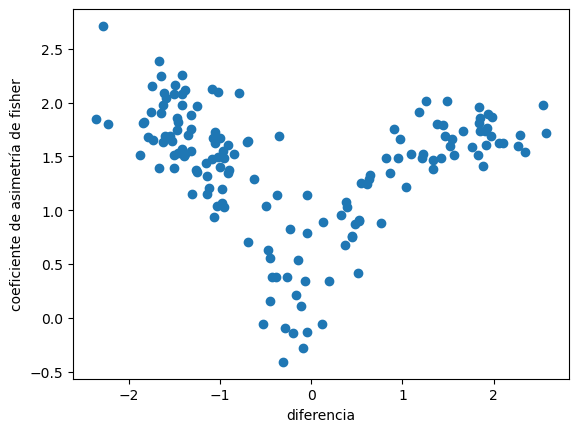

In [31]:
plt.scatter(df["diferencia"], df["fisher"])
plt.xlabel('diferencia')
plt.ylabel('coeficiente de asimetría de fisher')

Corremos el K-means

In [32]:
X = np.array(df[["fisher", "diferencia"]])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
etiquetas = list(kmeans.labels_)

Graficamos el resultado

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


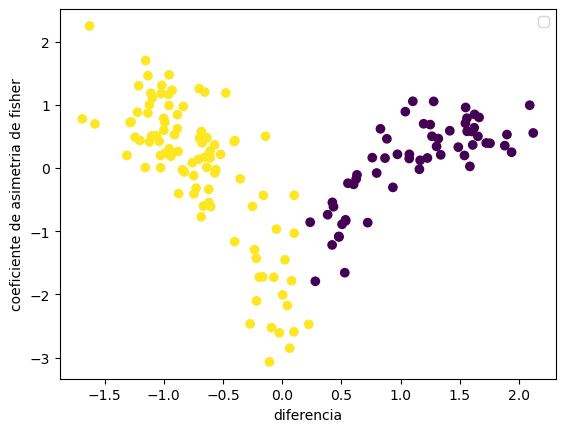

In [33]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 0], c=kmeans.labels_)
centroids = kmeans.cluster_centers_

plt.legend()
plt.xlabel('diferencia')
plt.ylabel('coeficiente de asimetria de fisher')
plt.show()

Añadimos la clasificación a la lista de estaciones

In [34]:
assert len(df) == len(etiquetas)
etiquetas = np.array(etiquetas)
df = np.column_stack((df, etiquetas))
df
df = pd.DataFrame(df, columns=["Estacion_Parada","diferencia","fisher","numero_est","cluster"])

In [35]:
df

,Estacion_Parada,diferencia,fisher,numero_est,cluster
0,(02000) Cabecera Autopista Norte,0.447466,0.756385,02000,0
1,(02001) Centro Comercial Santa Fe,0.904673,1.755713,02001,0
2,(02101) Toberín,0.638087,1.288913,02101,0
3,(02102) Calle 161,0.389717,1.032363,02102,0
4,(02103) Mazurén,0.522726,0.900935,02103,0
...,...,...,...,...,...
150,(40000) Cable Portal Tunal,-1.875105,1.508704,40000,1
151,(40001) Juan Pablo II,1.836211,1.80752,40001,0
152,(40002) Manitas,1.855708,1.732941,40002,0
153,(40003) Mirador del Paraiso,1.936778,1.889893,40003,0


hacemos un joint con el shapefile para graficar

In [36]:
df_estaciones_shp = pd.merge(troncales_shapefile, df, on='numero_est')

In [37]:
df_estaciones_shp

,objectid,numero_est,nombre_est,coordenada,coordena_1,ubicacion_,troncal_es,numero_vag,numero_acc,biciestaci,...,componen_1,log_replic,geometry,longitud_y_latitud,longitud,latitud,Estacion_Parada,diferencia,fisher,cluster
0,1,07103,AV. Chile,1.000327e+06,1.007756e+06,Kr 30 Cl 72,NQS,6,2,0,...,NaN,NaN,POINT (-74.07456 4.66634),-74.0746 4.66634,-74.0746,4.66634,(07103) AV. CHILE,-1.595363,2.045764,1
1,2,06103,CAN,9.976100e+05,1.005604e+06,Carrera 60,Calle 26,4,1,0,...,NaN,NaN,POINT (-74.09905 4.64688),-74.099 4.64688,-74.099,4.64688,(06103) CAN,-1.759302,1.909812,1
2,3,07106,Campín,9.998678e+05,1.005440e+06,Kr 30 Cl 53,NQS,2,2,0,...,NaN,NaN,POINT (-74.07870 4.64540),-74.0787 4.6454,-74.0787,4.6454,(07106) EL CAMPIN,-1.457684,1.528806,1
3,4,10008,San Diego,1.000667e+06,1.001625e+06,Kra 10- Cl23,Cr 7-10,2,2,0,...,NaN,NaN,POINT (-74.07150 4.61090),-74.0715 4.6109,-74.0715,4.6109,(10008) San Diego,-1.673976,1.39659,1
4,5,04100,Granja - Carrera 77,9.979466e+05,1.011384e+06,Carrera 77 Bis,Calle 80,3,2,0,...,NaN,NaN,POINT (-74.09602 4.69915),-74.096 4.69915,-74.096,4.69915,(04100) Carrera 77,1.090875,1.519111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,12004,San Fason Carrera 22,9.989787e+05,1.001506e+06,Av. Americas -Carrera 22,Americas,2,2,0,...,NaN,NaN,POINT (-74.08671 4.60982),-74.0867 4.60982,-74.0867,4.60982,(12004) Carrera 22,-1.508342,1.508822,1
145,146,09003,Socorro,9.946663e+05,9.965122e+05,Carrera 16B - Carrera 14A,Caracas,2,2,0,...,NaN,NaN,POINT (-74.12557 4.56466),-74.1256 4.56466,-74.1256,4.56466,(09003) Socorro,1.331806,1.380246,0
146,147,03003,21 Ángeles,9.996288e+05,1.015397e+06,Av Suba Cl 136,Suba,2,1,0,...,NaN,NaN,POINT (-74.08085 4.73543),-74.0809 4.73543,-74.0809,4.73543,(03003) 21 ANGELES,0.954757,1.484136,0
147,148,09115,Calle 34,1.000860e+06,1.002807e+06,Avenida Calle 34 - Calle 3,Caracas,3,2,0,...,NaN,NaN,POINT (-74.06975 4.62159),-74.0698 4.62159,-74.0698,4.62159,(09115) Calle 34,-1.414082,1.972724,1


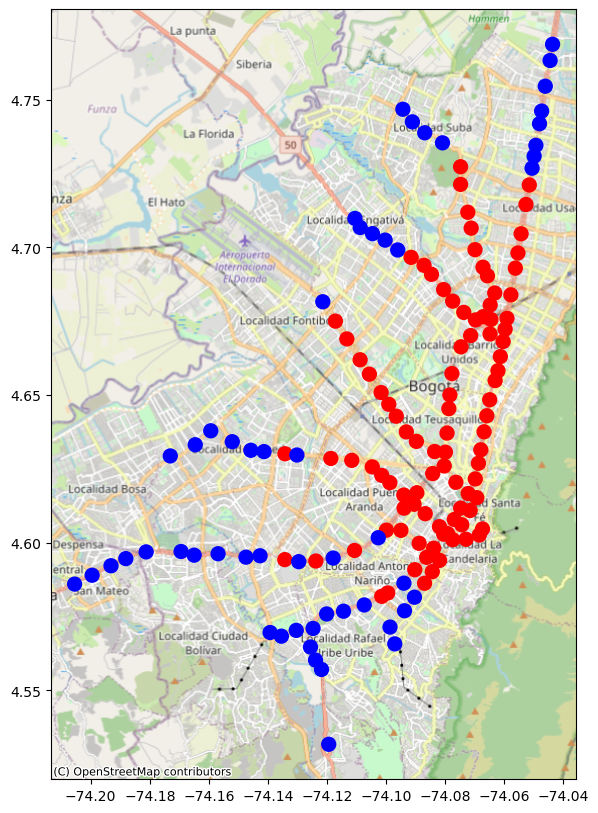

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
colors = np.where(df_estaciones_shp['cluster']==1, 'red', 'blue')
ax.scatter(df_estaciones_shp.geometry.x, df_estaciones_shp.geometry.y, color=colors, s=100, alpha=1)
ctx.add_basemap(ax, crs=df_estaciones_shp.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

<h2>segunda etapa</h2>

Ahora vamos a realizar un KNN con K=1 en el cual vamos a relacionar los precios comerciales de las estaciones con su estación de trasmilenio más cercana, esto con el fin de hallar una variable proxy de los ingresos de las personas que usan las diferentes estaciones de transmilenio

Iniciamos importando el shapefie desde local, para posteriormente graficarlo y 

In [43]:
os.chdir("C:/Users/PC/Documents/Repos/K-omo_solucionar_Bog")
avaluo_manzana_shapefile = gpd.read_file("../datos/tm/Avaluo_Manzana.shp")

avaluo_manzana_shapefile


,OBJECTID,MANZANA_ID,CP_TERR_AR,GRUPOP_TER,AVALUO_COM,AVALUO_CAT,OBSERVACIO,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry
0,1,009259086,N,RESIDENCIAL,951874.0,733096.0,Este valor corresponde a la mediana y puede di...,{70BABE94-C17D-48FC-ADD0-BEF0283A45B4},0.002464,1.213815e-07,"POLYGON ((-74.12100 4.74751, -74.12101 4.74747..."
1,2,001355027,N,RESIDENCIAL,973208.0,666239.0,Este valor corresponde a la mediana y puede di...,{73AA8E80-CC4E-4DF5-887F-E1620A2356E4},0.000684,2.818937e-08,"POLYGON ((-74.09776 4.55222, -74.09776 4.55221..."
2,3,001355010,N,RESIDENCIAL,1100000.0,818602.0,Este valor corresponde a la mediana y puede di...,{ED6BDEF8-72FB-40F3-B4B5-A979800F5B47},0.000875,2.915943e-08,"POLYGON ((-74.09745 4.55194, -74.09747 4.55190..."
3,4,001355012,N,RESIDENCIAL,687104.0,469428.0,Este valor corresponde a la mediana y puede di...,{2EBCB819-9A4E-4F41-9A8B-0578AE28045A},0.001018,3.175301e-08,"POLYGON ((-74.09723 4.55258, -74.09718 4.55258..."
4,5,001355021,N,RESIDENCIAL,697258.0,474940.0,Este valor corresponde a la mediana y puede di...,{F25CC9EA-C4FA-49D6-9878-5EF2EBEE73FA},0.002131,9.812038e-08,"POLYGON ((-74.09668 4.55296, -74.09673 4.55288..."
...,...,...,...,...,...,...,...,...,...,...,...
43842,43843,002539009,N,RESIDENCIAL,613216.0,411971.0,Este valor corresponde a la mediana y puede di...,{1F31D653-612E-4058-A22C-F0B6DEAB66D2},0.002613,3.146819e-07,"POLYGON ((-74.15042 4.54514, -74.15038 4.54521..."
43843,43844,009263068,N,RESIDENCIAL,800000.0,561146.0,Este valor corresponde a la mediana y puede di...,{0904C68C-4568-4831-A0C9-B6903E3B0565},0.008599,1.403546e-06,"POLYGON ((-74.08607 4.72440, -74.08606 4.72440..."
43844,43845,NaN,NaN,NaN,0.0,0.0,Este valor corresponde a la mediana y puede di...,{3DF9EEB9-E5F8-40A2-B290-5DEC0C7F88AB},0.004493,1.263776e-06,"POLYGON ((-74.20958 4.62905, -74.21049 4.62863..."
43845,43846,001325032,N,LOTES,196734.0,163072.0,Este valor corresponde a la mediana y puede di...,{13FD0455-4AB7-41E9-9B7C-C0DA25854E31},0.015094,5.541504e-06,"POLYGON ((-74.08883 4.52689, -74.08883 4.52688..."


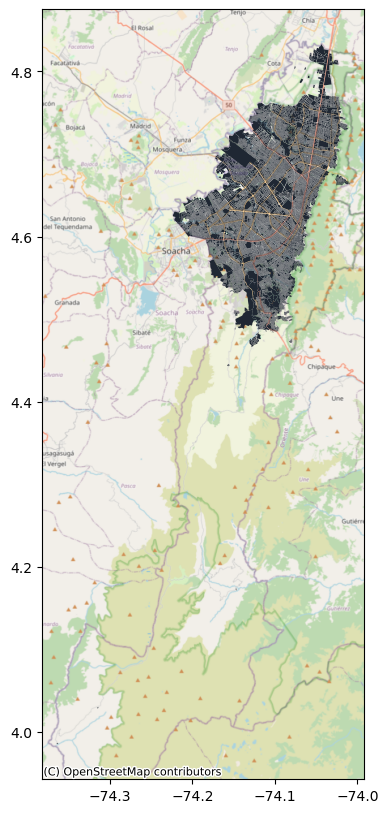

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
avaluo_manzana_shapefile.plot(ax=ax, color="#1f2733", markersize=10, alpha=1)
ctx.add_basemap(ax, crs=avaluo_manzana_shapefile.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [58]:
def nearest(row, geom_union, df1, df2, geom1_col='geometry', geom2_col='geometry', src_column=None):
    """Find the nearest point and return the corresponding value from specified column."""
    # Find the geometry that is closest
    nearest = df2[geom2_col] == nearest_points(row[geom1_col], geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    value = df2[nearest][src_column].values[0]
    return value

In [48]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
unary_union = troncales_shapefile.unary_union

Calculamos el centroide de cada una de las manzanas

In [47]:
avaluo_manzana_shapefile['centroid'] = avaluo_manzana_shapefile.centroid
avaluo_manzana_shapefile.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_28216\1010040113.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  avaluo_manzana_shapefile['centroid'] = avaluo_manzana_shapefile.centroid


,OBJECTID,MANZANA_ID,CP_TERR_AR,GRUPOP_TER,AVALUO_COM,AVALUO_CAT,OBSERVACIO,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry,centroid
0,1,009259086,N,RESIDENCIAL,951874.0,733096.0,Este valor corresponde a la mediana y puede di...,{70BABE94-C17D-48FC-ADD0-BEF0283A45B4},0.002464,1.213815e-07,"POLYGON ((-74.12100 4.74751, -74.12101 4.74747...",POINT (-74.12149 4.74769)
1,2,001355027,N,RESIDENCIAL,973208.0,666239.0,Este valor corresponde a la mediana y puede di...,{73AA8E80-CC4E-4DF5-887F-E1620A2356E4},0.000684,2.818937e-08,"POLYGON ((-74.09776 4.55222, -74.09776 4.55221...",POINT (-74.09774 4.55234)
2,3,001355010,N,RESIDENCIAL,1100000.0,818602.0,Este valor corresponde a la mediana y puede di...,{ED6BDEF8-72FB-40F3-B4B5-A979800F5B47},0.000875,2.915943e-08,"POLYGON ((-74.09745 4.55194, -74.09747 4.55190...",POINT (-74.09755 4.55205)
3,4,001355012,N,RESIDENCIAL,687104.0,469428.0,Este valor corresponde a la mediana y puede di...,{2EBCB819-9A4E-4F41-9A8B-0578AE28045A},0.001018,3.175301e-08,"POLYGON ((-74.09723 4.55258, -74.09718 4.55258...",POINT (-74.09709 4.55254)
4,5,001355021,N,RESIDENCIAL,697258.0,474940.0,Este valor corresponde a la mediana y puede di...,{F25CC9EA-C4FA-49D6-9878-5EF2EBEE73FA},0.002131,9.812038e-08,"POLYGON ((-74.09668 4.55296, -74.09673 4.55288...",POINT (-74.09694 4.55280)


Usamos la función creada en un principio para calcular la estación más cercana de cada una de nuestras manzanas, y agregamos esta estación al shp

In [60]:
avaluo_manzana_shapefile['nearest_estación'] = avaluo_manzana_shapefile.apply(nearest, geom_union=unary_union, df1=avaluo_manzana_shapefile, df2=troncales_shapefile, geom1_col='centroid', src_column='nombre_est', axis=1)
avaluo_manzana_shapefile.head()

,OBJECTID,MANZANA_ID,CP_TERR_AR,GRUPOP_TER,AVALUO_COM,AVALUO_CAT,OBSERVACIO,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry,centroid,nearest_estación
0,1,009259086,N,RESIDENCIAL,951874.0,733096.0,Este valor corresponde a la mediana y puede di...,{70BABE94-C17D-48FC-ADD0-BEF0283A45B4},0.002464,1.213815e-07,"POLYGON ((-74.12100 4.74751, -74.12101 4.74747...",POINT (-74.12149 4.74769),Portal de Suba
1,2,001355027,N,RESIDENCIAL,973208.0,666239.0,Este valor corresponde a la mediana y puede di...,{73AA8E80-CC4E-4DF5-887F-E1620A2356E4},0.000684,2.818937e-08,"POLYGON ((-74.09776 4.55222, -74.09776 4.55221...",POINT (-74.09774 4.55234),Portal 20 de Julio
2,3,001355010,N,RESIDENCIAL,1100000.0,818602.0,Este valor corresponde a la mediana y puede di...,{ED6BDEF8-72FB-40F3-B4B5-A979800F5B47},0.000875,2.915943e-08,"POLYGON ((-74.09745 4.55194, -74.09747 4.55190...",POINT (-74.09755 4.55205),Portal 20 de Julio
3,4,001355012,N,RESIDENCIAL,687104.0,469428.0,Este valor corresponde a la mediana y puede di...,{2EBCB819-9A4E-4F41-9A8B-0578AE28045A},0.001018,3.175301e-08,"POLYGON ((-74.09723 4.55258, -74.09718 4.55258...",POINT (-74.09709 4.55254),Portal 20 de Julio
4,5,001355021,N,RESIDENCIAL,697258.0,474940.0,Este valor corresponde a la mediana y puede di...,{F25CC9EA-C4FA-49D6-9878-5EF2EBEE73FA},0.002131,9.812038e-08,"POLYGON ((-74.09668 4.55296, -74.09673 4.55288...",POINT (-74.09694 4.55280),Portal 20 de Julio


Ahora debemos agrupar por estación (nearest_estacion) y sacar promedios de cada una de las manzanas asociadas a esa estación 

In [61]:
avaluo_manzana_shapefile.groupby("nearest_estación")
avaluo_manzana